In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from metodos_minimos_quadrados import minimos_quadrados as mmq, regressao_linear, coeficiente_determinacao as cd

In [2]:
dados = pd.read_csv('dados.txt', sep='\t', decimal=',', header=None)

In [3]:
x = dados[0].values
y = dados[1].values

## Dados da cotação diária das ações da empresa Petrobras (PETR4) nos últimos 2 anos

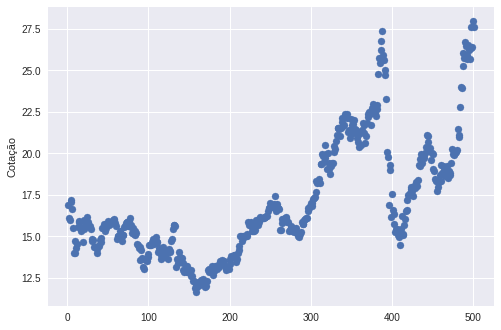

In [4]:
plt.scatter(x,y)
plt.ylabel('Cotação')
plt.show()

## Aplicando o método de mínimos quadrados para diversas ordens 

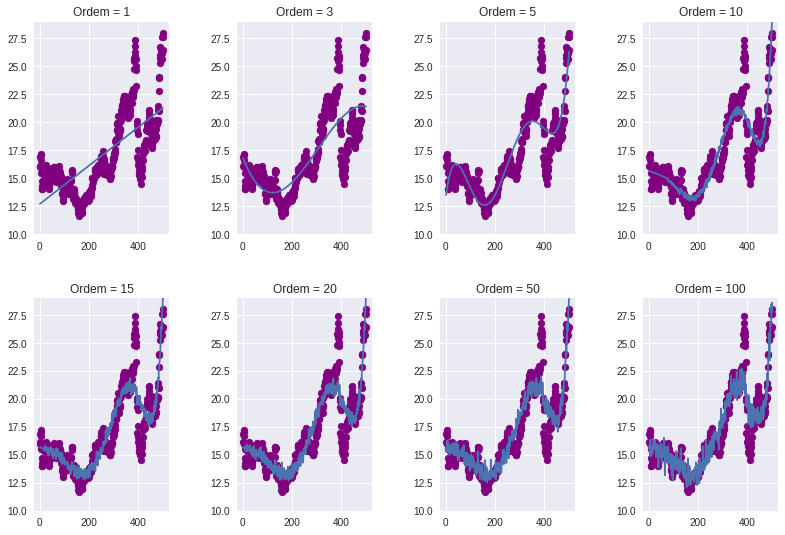

In [5]:
ordens = [1,3,5,10,15,20,50,100]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(11, 9))
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.5)
c = 0
l = 0

for ordem in ordens:
    
    axarr[l, c].scatter(x,y, label='Dados', c='purple') # plotando os pontos dados
    
    reg = mmq(x,y,ordem) # deteterminando a função de regressão
    
    r = [reg(xi) for xi in x]  
    
    axarr[l, c].plot(x, r) # plotando valores obtidos
    
    axarr[l, c].set_title('Ordem = '+str(ordem))
    axarr[l, c].set_ylim(10,y.max()+1)
    
    c+=1
    if (c >= 4): # auxiliares para plot em formato de tabela
        c = 0
        l += 1

plt.savefig('mmq.png', bbox_inches='tight')
plt.show()

## Valores dos coeficientes de determinação

In [6]:
cf = [] # Lista de coeficientes de determinação de cada ordem

for ordem in ordens:
    reg = mmq(x,y,ordem) # deteterminando a função de regressão
    
    valores = [reg(xi) for xi in x] 
    
    cf.append(cd(c,y,valores) * 100) # cf * 100 para armazenar em formato de porcentagem

In [7]:
cf

[71.09284708160452133,
 79.100951194093177335,
 87.50227594557080382,
 90.42585958394892692,
 90.70321476837830187,
 90.80170107983894507,
 91.13643734463794634,
 92.053260320484222204]

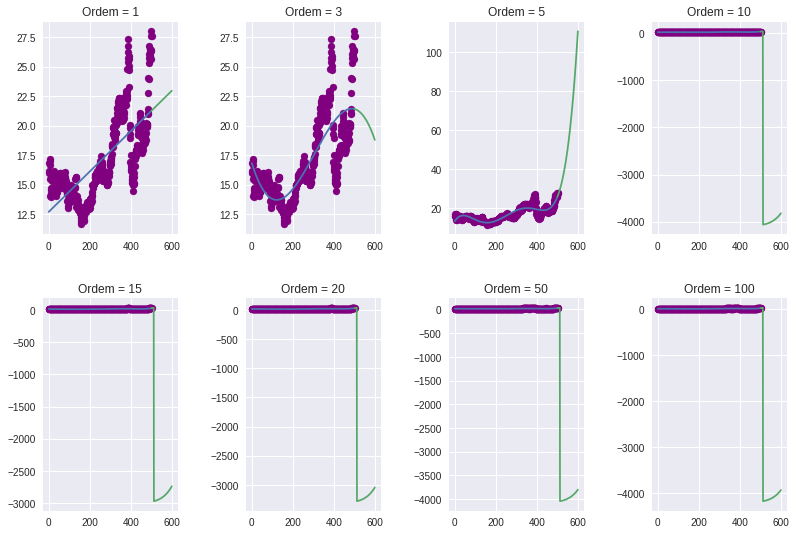

In [17]:
ordens = [1,3,5,10,15,20,50,100]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(11, 9))
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.5)
c = 0
l = 0

for ordem in ordens:
    
    axarr[l, c].scatter(x,y, label='Dados', c='purple') # plotando os pontos dados
    
    reg = mmq(x,y,ordem) # deteterminando a função de regressão
    
    xn = np.arange(600)
    
    r = np.array([reg(xi) for xi in xn])
    
    axarr[l, c].plot(xn[:500], r[:500]) # plotando valores obtidos
    axarr[l, c].plot(xn[500:], r[500:]) # plotando valores previstos
    
    axarr[l, c].set_title('Ordem = '+str(ordem))
    
    c+=1
    if (c >= 4): # auxiliares para plot em formato de tabela
        c = 0
        l += 1

plt.savefig('mmq_previsao.png', bbox_inches='tight')
plt.show()

## Localizando ponto em que ocorre Overflow

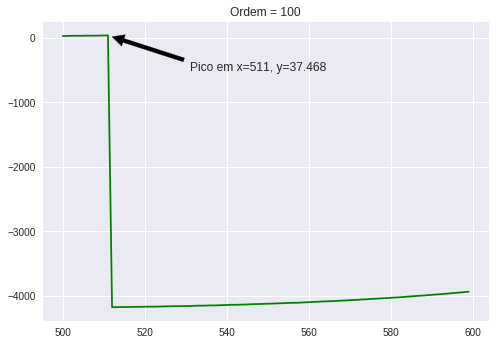

In [18]:
reg = mmq(x,y,ordem)
    
xn = np.arange(500,600)

r = np.array([reg(xi) for xi in xn])

fig, ax = plt.subplots()
ax.plot(xn,r, color='g')

xmax = 511
ymax = r.max()
ax.annotate("Pico em x={}, y={:.3f}".format(xmax, ymax), xy=(xmax, ymax), xytext=(xmax+20, ymax-550),
            arrowprops=dict(facecolor='black', shrink=0.05) )
ax.set_title('Ordem = 100')

plt.savefig('ordem100.png', bbox_inches='tight')
plt.show()